<a href="https://colab.research.google.com/github/Y-YHat/gen_ai_course/blob/main/3_Classification_Sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem statement: Classification model to analyze Amazon product reviews

The objective is to create a classification model that will analyze Amazon product reviews to classify sentiments as positive or negative. Here's a breakdown of the steps involved in this workflow:

- Step 1: Load the Dataset
- Step 2: Data Pre-processing
- Step 3: Feature Selection
- Step 4: Model Selection
- Step 5: Training the Model
- Step 6: Model Evaluation
- Step 7: Hyperparameter Tuning
- Step 8: Cross Validation

The notebook contains 7 exercises in total:

* [Exercise 1](#ex_1)
* [Exercise 2](#ex_2)
* [Exercise 3](#ex_3)
* [Exercise 4](#ex_4)
* [Exercise 5](#ex_5)
* [Exercise 6](#ex_6)
* [Exercise 7](#ex_7)

## Step 1: Load the dataset
First, let's load the dataset from Google Drive. You need to upload the dataset and then read the CSV file into a pandas DataFrame.

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
# Import necessary libraries
import pandas as pd

# Load the dataset into a DataFrame
df = pd.read_csv("/content/drive/My Drive/data/amazon-product-review-data.csv")

# Display the first few rows to check if the data is loaded correctly
df.head()

,market_place,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,sentiments
0,"""US""","""42521656""","""R26MV8D0KG6QI6""","""B000SAQCWC""","""159713740""","""The Cravings Place Chocolate Chunk Cookie Mix...","""Grocery""",1,0,0,0 \t(N),1 \t(Y),"""Using these for years - love them.""","""As a family allergic to wheat, dairy, eggs, n...",2015-08-31,positive
1,"""US""","""12049833""","""R1OF8GP57AQ1A0""","""B00509LVIQ""","""138680402""","""Mauna Loa Macadamias, 11 Ounce Packages""","""Grocery""",1,0,0,0 \t(N),1 \t(Y),"""Wonderful""","""My favorite nut. Creamy, crunchy, salty, and ...",2015-08-31,positive
2,"""US""","""107642""","""R3VDC1QB6MC4ZZ""","""B00KHXESLC""","""252021703""","""Organic Matcha Green Tea Powder - 100% Pure M...","""Grocery""",1,0,0,0 \t(N),0 \t(N),"""Five Stars""","""This green tea tastes so good! My girlfriend ...",2015-08-31,positive
3,"""US""","""6042304""","""R12FA3DCF8F9ER""","""B000F8JIIC""","""752728342""","""15oz Raspberry Lyons Designer Dessert Syrup S...","""Grocery""",1,0,0,0 \t(N),1 \t(Y),"""Five Stars""","""I love Melissa's brand but this is a great se...",2015-08-31,positive
4,"""US""","""18123821""","""RTWHVNV6X4CNJ""","""B004ZWR9RQ""","""552138758""","""Stride Spark Kinetic Fruit Sugar Free Gum, 14...","""Grocery""",1,0,0,0 \t(N),1 \t(Y),"""Five Stars""","""good""",2015-08-31,positive


## Step 2: Data Pre-processing





In [10]:
# Import necessary libraries for data pre-processing
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

# Remove any rows with missing values
df.dropna(inplace=True)

# Encode the 'sentiments' column (positive/negative) to numerical values (0/1)
le = LabelEncoder()
df['sentiments'] = le.fit_transform(df['sentiments'])

# Text data preprocessing using TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X = tfidf_vectorizer.fit_transform(df['review_body']).toarray()
y = df['sentiments'].values

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('80/20 Split')
# Display the shapes of the resulting data
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


80/20 Split
X_train shape: (400, 3466)
X_test shape: (100, 3466)
y_train shape: (400,)
y_test shape: (100,)


<a name="ex_1"></a>
## Exercise 1

- Use the train_test_split function and change the test_size to 0.3

This way the training set (X and y) should be 70% and the testing set(X and y) should be 30%

In [11]:
#Write your code here
print('70/30 Split')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

70/30 Split
X_train shape: (350, 3466)
X_test shape: (150, 3466)
y_train shape: (350,)
y_test shape: (150,)


## Step 3: Feature Selection

In this step, we'll perform feature selection to reduce the dimensionality of the TF-IDF vectorized data and potentially improve the model's performance. We'll use feature selection techniques like chi-squared (chi2) or mutual information to select the most important features.

In [12]:
from sklearn.feature_selection import SelectKBest, chi2

# Apply feature selection using chi-squared (chi2) test
# You can adjust the number of features (k) as needed
k = 1000
selector = SelectKBest(chi2, k=k)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Display the shapes of the selected feature sets
print("X_train_selected shape:", X_train_selected.shape)
print("X_test_selected shape:", X_test_selected.shape)

X_train_selected shape: (350, 1000)
X_test_selected shape: (150, 1000)


<a name="ex_2"></a>
## Exercise 2

- Compare the X_train_selected shape and X_test_selected shape with the new test_size=0.3

In [13]:
#Write your code here
print("X_train_selected shape:", X_train_selected.shape)

print("X_train shape:", X_train.shape)

X_train_selected shape: (350, 1000)
X_train shape: (350, 3466)


We have successfully performed feature selection, reducing the dimensionality of the data while retaining the most important features.


Visualising the distributions of features and labels before and after the splitting to check if the splits have maintained the original distributions.

We can compare summary statistics and visualize a subset of the data to check if the splits have maintained the original distributions.

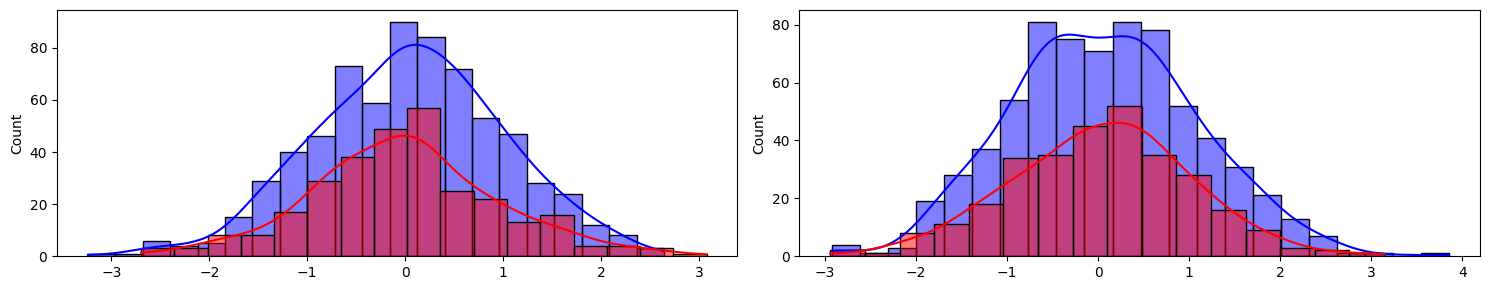

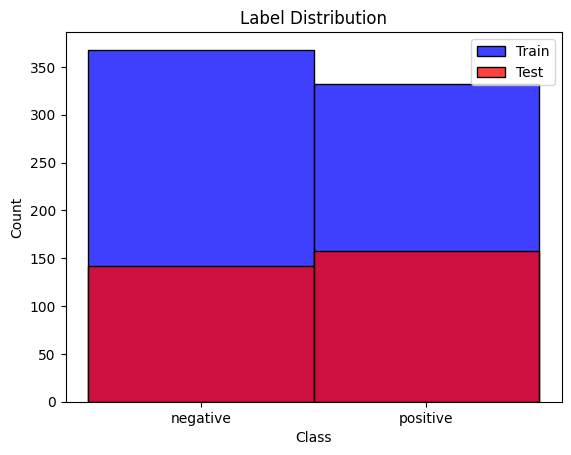

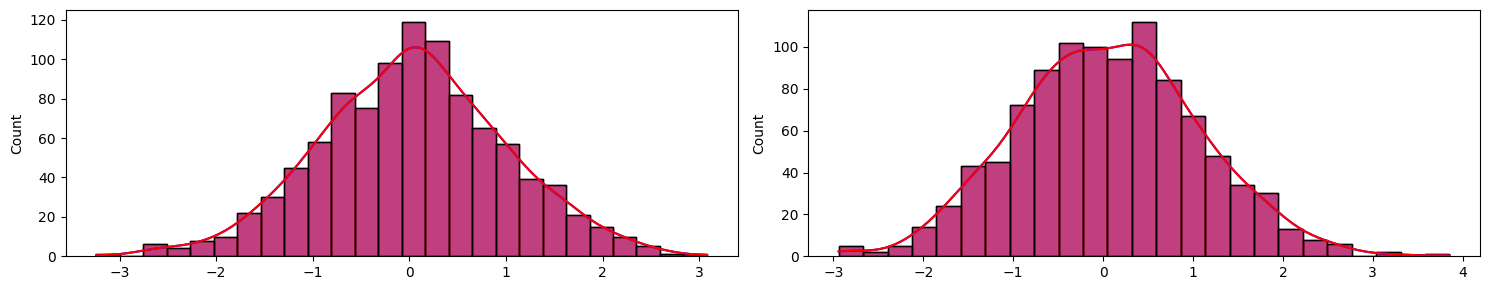

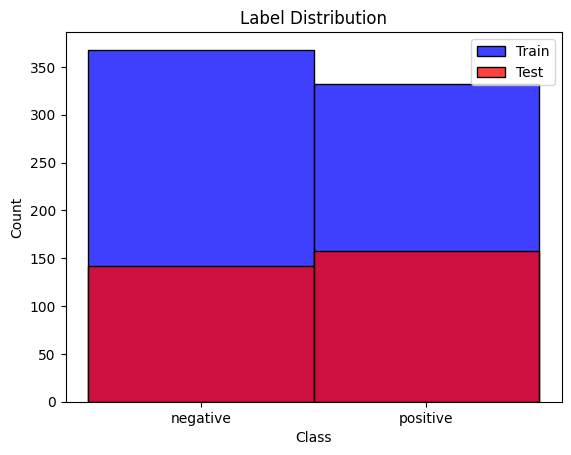

In [19]:
# Select a subset of the data for visualization and summary statistics
subset_size = 1000
X_train_subset = X_train[:subset_size]
X_test_subset = X_test[:subset_size]
y_train_subset = y_train[:subset_size]
y_test_subset = y_test[:subset_size]

# Visualize the distributions of features and labels before and after splitting
fig, axes = plt.subplots(nrows=1, ncols=X_train_subset.shape[1], figsize=(15, 3))
for i in range(X_train_subset.shape[1]):
    sns.histplot(X_train_subset[:, i], ax=axes[i], kde=True, color='blue', label='Train')
    sns.histplot(X_test_subset[:, i], ax=axes[i], kde=True, color='red', label='Test')
plt.tight_layout()
plt.show()

sns.histplot(y_train_subset, bins=np.arange(3)-0.5, color='blue', discrete=True, label='Train')
sns.histplot(y_test_subset, bins=np.arange(3)-0.5, color='red', discrete=True, label='Test')
plt.title("Label Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(range(2), le.classes_)
plt.legend()
plt.show()


# Visualize the distributions of features and labels before and after splitting
fig, axes = plt.subplots(nrows=1, ncols=X_train_subset.shape[1], figsize=(15, 3))
for i in range(X.shape[1]):
    sns.histplot(X[:, i], ax=axes[i], kde=True, color='blue', label='Train')
    sns.histplot(X[:, i], ax=axes[i], kde=True, color='red', label='Test')
plt.tight_layout()
plt.show()

sns.histplot(y_train_subset, bins=np.arange(3)-0.5, color='blue', discrete=True, label='Train')
sns.histplot(y_test_subset, bins=np.arange(3)-0.5, color='red', discrete=True, label='Test')
plt.title("Label Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(range(2), le.classes_)
plt.legend()
plt.show()

The result of the split follow the original dataset distribtion.



## Step 4: Model Selection
For sentiment analysis, you can use various machine learning algorithms like Logistic Regression, Naive Bayes, Support Vector Machines, or even deep learning models like LSTM or BERT. Since you're a beginner, let's start with a simple model like Logistic Regression.

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
model = LogisticRegression(random_state=42)


<a name="ex_3"></a>
## Exercise 3

What does the random_state (parameter of the LogisticRegression) represent?

**Answer**: Write your answer here

The `random_state` parameter in the `LogisticRegression` model, as well as in many other machine learning models in scikit-learn, is used to set a seed for the random number generator. This ensures that the random initialization of the algorithm's parameters is reproducible.

When you set a `random_state` value, the algorithm will initialize its internal parameters based on that seed. This is particularly useful for reproducibility – if you use the same seed, you should get the same results every time you run the model.

For example, if you have the following code:

```python
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=42)
```

Setting `random_state=42` means that every time you train this logistic regression model, it will be initialized in the same way, provided the other conditions (data, preprocessing, etc.) remain constant. This is important when you want to compare resulults or share your work  others, ensuring that they obtain the same outcomes.

It's worth noting that the specific impact of `random_state` depends on the algorithm and the library being used. In the case of scikit-learn's logistic regression, it affects the random initialization of the optimization algorithm used to find the optimal parameters for the model.

## Step 5: Training the Model

Now that we have initialized our Logistic Regression model, it's time to train it on the selected features from the training dataset.



In [ ]:

# Train the Logistic Regression model on the selected features
model.fit(X_train_selected, y_train)

# We can now proceed to Step 7: Model Evaluation

LogisticRegression(random_state=42)

## Step 6: Model Evaluation

In this step, we'll evaluate the performance of the trained Logistic Regression model using the testing data.

- We import necessary metrics from `sklearn.metrics` such as `accuracy_score`, `classification_report`, and `confusion_matrix`.
- We use the trained model to predict sentiment labels (`y_pred`) for the test data (`X_test_selected`).
- We calculate the accuracy of the model by comparing the predicted labels to the true labels.
- We display a classification report that includes precision, recall, F1-score, and support for both positive and negative sentiment classes.
- We display a confusion matrix to visualize the true positive, true negative, false positive, and false negative predictions.



In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict sentiment labels for the test data
y_pred = model.predict(X_test_selected)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display a classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Display a confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.8466666666666667

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        23
           1       0.85      1.00      0.92       127

    accuracy                           0.85       150
   macro avg       0.42      0.50      0.46       150
weighted avg       0.72      0.85      0.78       150


Confusion Matrix:
[[  0  23]
 [  0 127]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<a name="ex_4"></a>
## Exercise 4

- Compare the Results with the new data split with the results of the actual split.

In [ ]:
# Write your code here
# Train with the original split and check performance (80/20)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=42)

k = 1000
selector = SelectKBest(chi2, k=k)
X_train_selected2 = selector.fit_transform(X_train2, y_train2)
X_test_selected2 = selector.transform(X_test2)

model.fit(X_train_selected2, y_train2)

# Predict sentiment labels for the test data
y_pred2 = model.predict(X_test_selected2)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test2, y_pred2)
print("Accuracy:", accuracy)

# Display a classification report
print("\nClassification Report:")
print(classification_report(y_test2, y_pred2))

# Display a confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test2, y_pred2))

Accuracy: 0.86

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.86      1.00      0.92        86

    accuracy                           0.86       100
   macro avg       0.43      0.50      0.46       100
weighted avg       0.74      0.86      0.80       100


Confusion Matrix:
[[ 0 14]
 [ 0 86]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy is higher 0.86 with the original split 80/20 and the original features without feature selection.

<a name="ex_5"></a>
## Exercise 5

Do different training and testing sizes impact the model's learning and response to new data?

**Answer**: Write your answer here

Yes, the sizes of the training and testing datasets can impact the model's learning and its response to new, unseen data. The choice of the training and testing sizes is a crucial aspect of machine learning model evaluation, and it can influence several aspects of the model's behavior:

1. **Model Generalization:**
   - If the training dataset is too small, the model may not capture the underlying patterns in the data, leading to poor generalization to new, unseen data.
   - If the testing dataset is too small, the evaluation metrics may not provide a reliable estimate of the model's performance on a broader set of data.

2. **Overfitting and Underfitting:**
   - A very small training dataset may lead to overfitting, where the model memorizes the training data but fails to generalize to new data.
   - A very large training dataset is less likely to result in overfitting but could lead to underfitting if the model is too simple to capture the underlying patterns.

3. **Model Evaluation:**
   - The size of the testing dataset affects the reliability of model evaluation metrics. Larger test sets generally provide more robust estimates of the model's performance.

  
In this case the model performs better with 80/20 split than with 70/30. That could be due to a larger training set relative to the testing set compared to a 70/30 split. A larger training set might provide more diverse and representative examples for the model to learn from, potentially resulting in better generalization to unseen data.

It's also possible that with the 80/20 split, the model is overfitting to the training data. The larger training set provides more opportunities for the model to memorize the training examples, leading to higher accuracy on the training set but potentially poorer generalization to unseen data.

## Step 7: Hyperparameter Tuning

In this step, we'll perform hyperparameter tuning to optimize the Logistic Regression model's performance. We can search for the best hyperparameters using techniques like Grid Search or Random Search.

- We import `GridSearchCV` from `sklearn.model_selection`.
- We define a grid of hyperparameters to search, including 'C' (regularization parameter) and 'max_iter' (maximum iterations).
- We initialize Grid Search with cross-validation (5-fold) to find the best hyperparameters.
- The best hyperparameters are extracted using `grid_search.best_params_`.
- We fit the tuned model with the best hyperparameters to the training data.
- Finally, we evaluate the tuned model's accuracy on the test data.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to search
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameters
    'max_iter': [100, 200, 300]  # Maximum number of iterations
}

# Initialize Grid Search with cross-validation (5-fold)
grid_search = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=5, verbose=1, n_jobs=-1)

# Fit the Grid Search to the data
grid_search.fit(X_train_selected, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Evaluate the model with the best hyperparameters
best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test_selected)

# Calculate the accuracy of the tuned model
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print("Tuned Model Accuracy:", accuracy_tuned)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Hyperparameters: {'C': 100, 'max_iter': 100}
Tuned Model Accuracy: 0.86


<a name="ex_6"></a>
## Exercise 6

- What is GridSearchCV used for?
- What are hyperparameters?
- Does the model give better results after hyperparameters ?

**Answer**: Write your answer here

* GridSearchCV is a class in scikit-learn library that is used for hyperparameter tuning of machine learning models.
Hyperparameters are parameters that are set before the model is trained and cannot be learned from the data.
* GridSearchCV uses an exhaustive search method to find the best combination of hyperparameters by evaluating
the model's performance on a subset of the data called the validation set.
It takes a param_grid parameter which contains all the hyperparameters and their possible values.
* GridSearchCV then trains and evaluates the model on all possible combinations of hyperparameters present in the param_grid.
This process helps to find the best set of hyperparameters that optimize the model's performance on the validation set.
The best set of hyperparameters is determined based on a scoring metric such as accuracy, precision, recall, or F1-score.
GridSearchCV then returns the model with the best hyperparameters.

It appears that the hyperparameter tuning did not significantly improve the model's accuracy in this case. The accuracy remains at 0.86.



## Step 8: Cross Validation

We'll use cross-validation to estimate how well the model will perform on unseen data and check if the model's performance is consistent across different folds of the data.

- We import `cross_val_score` from `sklearn.model_selection`.
- We perform 5-fold cross-validation on the tuned model (`best_model`) using the training data (`X_train_selected` and `y_train`).
- We calculate the mean cross-validation accuracy to get a more robust estimate of the model's performance.

In [ ]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation on the tuned model
cv_scores = cross_val_score(best_model, X_train_selected, y_train, cv=5)

# Calculate and display the mean cross-validation accuracy
mean_cv_accuracy = np.mean(cv_scores)
print("Mean Cross-Validation Accuracy:", mean_cv_accuracy)

Mean Cross-Validation Accuracy: 0.79


<a name="ex_7"></a>
## Exercise 7

- What is Cross Validation used for?
- Compare the new Validation score (with the new training and testing size)
- What do you conclude ?

**Answer**: Write your answer here

**What is Cross Validation used for?**

Cross validation is used for evaluating the performance of a machine learning model. It involves splitting the dataset into multiple subsets or folds.
The model is trained on a combination of folds called the training set and evaluated on the remaining fold called the validation set.
This process is repeated for each fold, so that each fold serves as the validation set exactly once.
The performance metrics obtained from each iteration are then averaged to get an overall performance estimate of the model.
Cross validation helps in obtaining a more reliable estimate of the model's performance by reducing the impact of data variability.

**Compare the new Validation score (with the new training and testing size)**

The Mean Cross-Validation Accuracy is 0.79, which is the average accuracy of the model across all cross-validation folds.
It is obtained by training the model on different subsets of the data and evaluating its performance on the remaining data.
This metric provides an estimate of how well the model generalizes to new, unseen data.

The Tuned Model Accuracy is 0.86, which is the accuracy of the best model obtained after performing hyperparameter tuning using GridSearchCV.
Hyperparameter tuning helps to find the best set of hyperparameters that optimize the model's performance on a validation set.
The Tuned Model Accuracy shows the performance of the model with the best hyperparameters found by GridSearchCV.

By comparing these two scores, we can see that the Tuned Model Accuracy is higher than the Mean Cross-Validation Accuracy.
This indicates that by tuning the hyperparameters, we were able to improve the model's performance and achieve a higher accuracy.

The improvement in accuracy from 0.79 to 0.86 suggests that the chosen hyperparameters were able to better capture the patterns in the data
and make more accurate predictions. This can lead to better performance of the model when applied to unseen data.